# Resumo

### Matriz

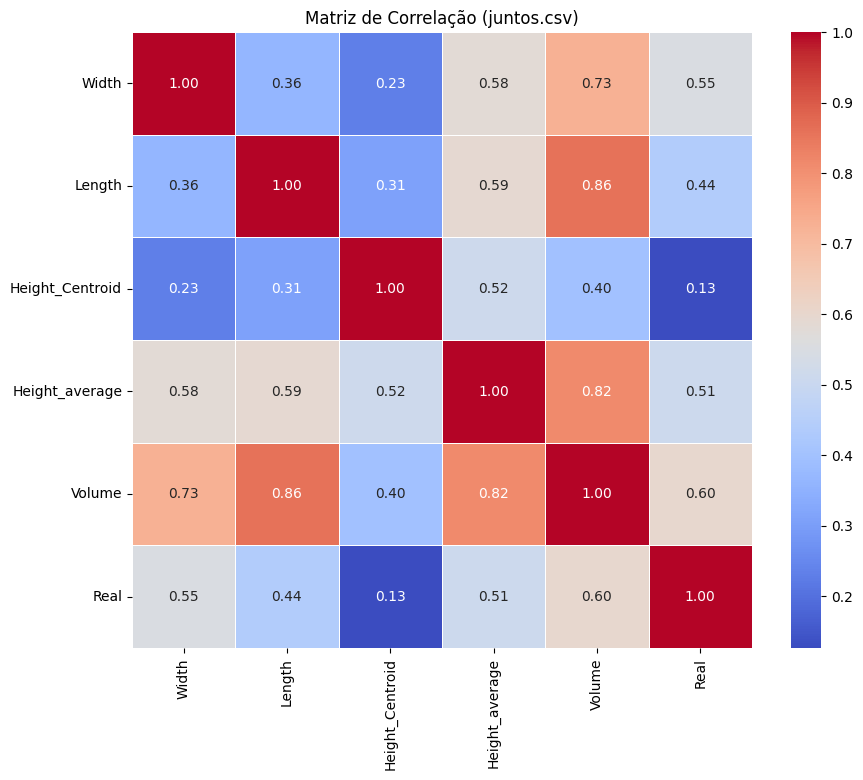

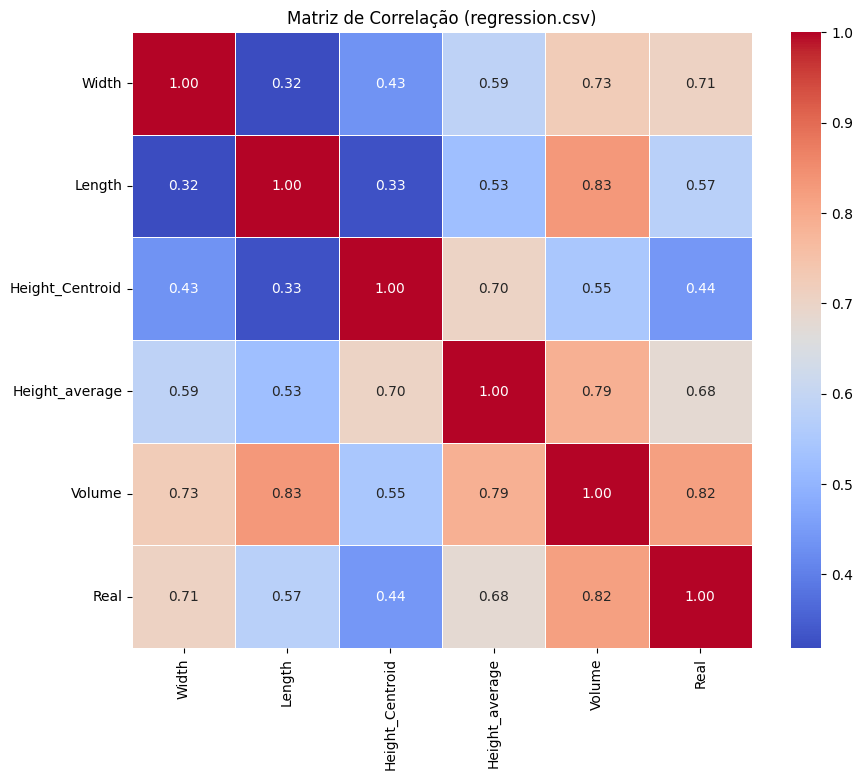

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/juntos.csv")
# remover colunas desnecessárias
df_reduzido = df.drop(columns=['Animal', 'ID', 'Frame'])

# calcular correlação
corr = df_reduzido.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matriz de Correlação (juntos.csv)')
plt.show()

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

df = pd.read_csv("datasets/regression.csv")
# remover colunas desnecessárias
df_reduzido = df.drop(columns=['Animal', 'ID', 'Frame'])

# calcular correlação
corr = df_reduzido.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matriz de Correlação (regression.csv)')
plt.show()

### Função para Calcular o Fator de Inflação da Variância (VIF - Variance Inflation Factor)
O VIF é uma métrica usada para detectar multicolinearidade entre variáveis preditoras em uma regressão. Se duas ou mais variáveis estiverem fortemente correlacionadas, isso pode afetar a estabilidade dos coeficientes no modelo.

O maior era o VOLUME com LENGTH

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data


# auxiliar - teste
def remove_outliers(df, features, threshold=1.5):
    """
    Remove outliers usando o método do IQR (Interquartile Range).
    """
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Modelos de Regressão

## *Antigo*

### Como está no GitLab

#### regression.csv

In [6]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("datasets/regression.csv")


X = df[['Width', 'Length', 'Height_Centroid', 'Height_average', 'Volume']].values
y = df['Real'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# treinar o modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# predições
y_pred = regr.predict(X_test)

# calcular metricas
mse_teste = mean_squared_error(y_test, y_pred)
mae = (abs(y_test - y_pred)).mean()
mape = ((abs(y_test - y_pred) / y_test) * 100).mean()
erro_medio = (y_pred - y_test).mean()
r2 = r2_score(y_test, y_pred)

print("Resultados para o modelo de Regressão Linear:")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"Erro Médio: {erro_medio}")
print(f"R²: {r2}")

result_df = pd.DataFrame({'Peso Real': y_test, 'Peso Predito': y_pred})
#print("\nComparação entre Peso Real e Peso Predito:")
#print(result_df.head())

# Adicionando a diferença
result_df['Diferença'] = result_df['Peso Real'] - result_df['Peso Predito']
print("\nDiferença entre Peso Real e Peso Predito:")
print(result_df[['Peso Real', 'Peso Predito', 'Diferença']].head())


result_df.to_csv("dataset_comparacao/antigo_regression.csv", index=False, encoding="utf-8")

Resultados para o modelo de Regressão Linear:
MAE: 24.11882616976083
MAPE: 7.1069252152700635%
Erro Médio: 1.1948713198056407
R²: 0.7246787874349859

Diferença entre Peso Real e Peso Predito:
   Peso Real  Peso Predito  Diferença
0        347    350.489301  -3.489301
1        384    375.934041   8.065959
2        403    416.503645 -13.503645
3        328    330.080517  -2.080517
4        289    275.305545  13.694455


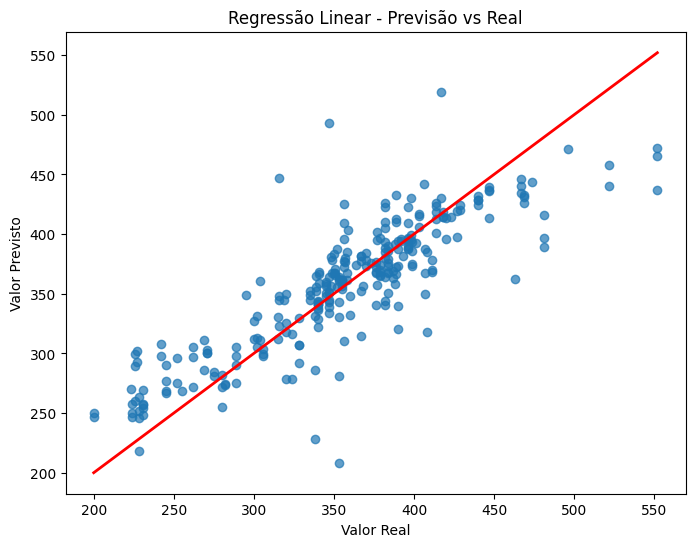

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Linha ideal
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Regressão Linear - Previsão vs Real")
plt.show()

#### juntos.csv

In [8]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("datasets/juntos.csv")


X = df[['Width', 'Length', 'Height_Centroid', 'Height_average', 'Volume']].values
y = df['Real'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# treinar o modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# predições
y_pred = regr.predict(X_test)

# calcular metricas
mse_teste = mean_squared_error(y_test, y_pred)
mae = (abs(y_test - y_pred)).mean()
mape = ((abs(y_test - y_pred) / y_test) * 100).mean()
erro_medio = (y_pred - y_test).mean()
r2 = r2_score(y_test, y_pred)

print("Resultados para o modelo de Regressão Linear:")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"Erro Médio: {erro_medio}")
print(f"R²: {r2}")

result_df = pd.DataFrame({'Peso Real': y_test, 'Peso Predito': y_pred})
#print("\nComparação entre Peso Real e Peso Predito:")
#print(result_df.head())

# Adicionando a diferença
result_df['Diferença'] = result_df['Peso Real'] - result_df['Peso Predito']
print("\nDiferença entre Peso Real e Peso Predito:")
print(result_df[['Peso Real', 'Peso Predito', 'Diferença']].head())


result_df.to_csv("dataset_comparacao/antigo_juntos.csv", index=False, encoding="utf-8")

Resultados para o modelo de Regressão Linear:
MAE: 31.600547678307716
MAPE: 8.35106490380858%
Erro Médio: -4.631705920917268
R²: 0.4318026146411449

Diferença entre Peso Real e Peso Predito:
   Peso Real  Peso Predito   Diferença
0        242    306.023120  -64.023120
1        396    388.642609    7.357391
2        347    317.868429   29.131571
3       1077    426.752110  650.247890
4        350    377.898900  -27.898900


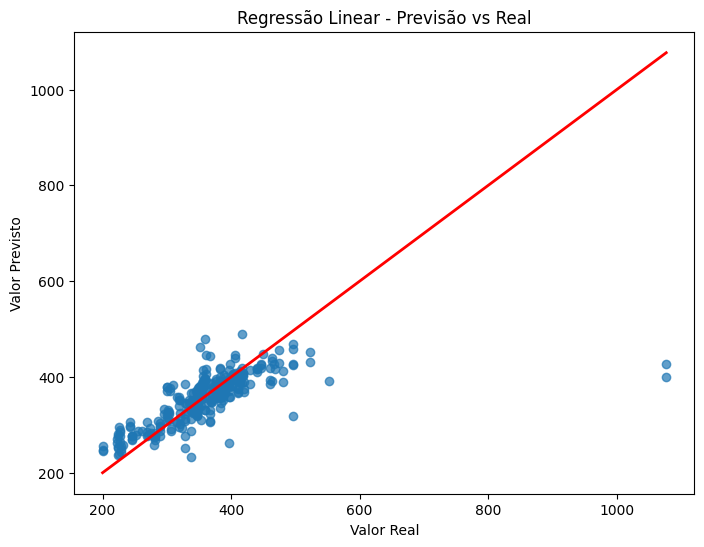

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Linha ideal
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Regressão Linear - Previsão vs Real")
plt.show()

## *XGBOOST*

In [10]:
def plot_distr_regr(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Linha ideal
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Previsto")
    plt.title("Regressão Linear - Previsão vs Real")
    plt.show()

### Com Novas Features

In [12]:
# dependencias

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### regression.csv

Resultados:
MAE: 11.367637579389614
MAPE: 3.28259736508624%
Erro Médio: -0.6082795506758656
R²: 0.9423196315765381

Comparação entre Peso Real e Peso Predito:
      Peso Real  Peso Predito  Diferença
558         347    375.703705 -28.703705
168         384    401.335236 -17.335236
240         403    383.222351  19.777649
664         328    322.507416   5.492584
271         289    305.309662 -16.309662
...         ...           ...        ...
155         423    425.506470  -2.506470
310         341    350.600220  -9.600220
1084        339    357.634644 -18.634644
423         379    382.051727  -3.051727
700         280    284.587738  -4.587738

[278 rows x 3 columns]


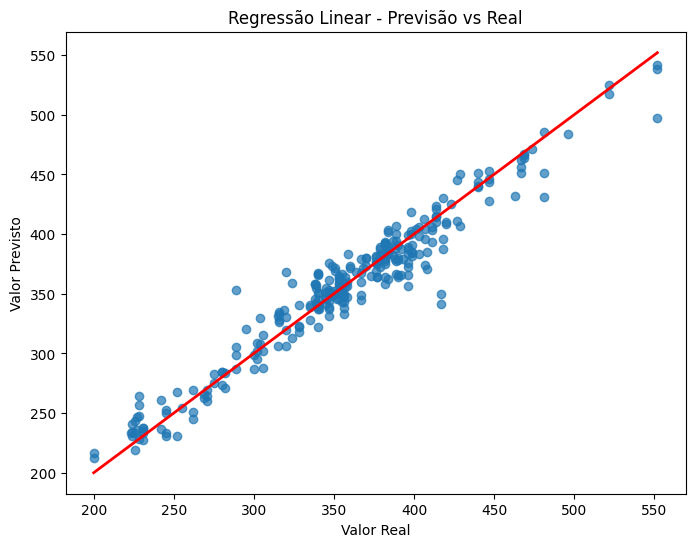

In [13]:
def predict_weight_optimized(model_path="datasets/regression.csv"):
    df = pd.read_csv(model_path)
    df = df[df['Real'] > 0].copy()
    
    # Criando features derivadas
    df['Aspect_Ratio'] = df['Width'] / df['Length']
    df['Density'] = df['Real'] / df['Volume']
    df['Height_Proportion'] = df['Height_Centroid'] / df['Height_average']
    
    features = ['Width', 'Length', 'Height_Centroid', 'Height_average', 'Aspect_Ratio', 'Density', 'Height_Proportion']
    
    # Remover outliers
    #df = remove_outliers(df, features)
    
    X = df[features].copy()
    y = df['Real'].copy()
    
    # Remover valores NaN ou infinitos
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y = y.loc[X.index]  # Garantir alinhamento dos índices
    
    # Normalização
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42,
        subsample=0.9,
        reg_lambda=5,
        reg_alpha=0.05,
        n_estimators=300,
        min_child_weight=2,
        max_depth=6,
        learning_rate=0.03,
        gamma=0.2,
        colsample_bytree=0.9
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Métricas de avaliação
    mse_teste = mean_squared_error(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    erro_medio = np.mean(y_pred - y_test)
    r2 = r2_score(y_test, y_pred)
    
    print("Resultados:")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")
    print(f"Erro Médio: {erro_medio}")
    print(f"R²: {r2}")
    
    # Comparação entre pesos reais e preditos
    result_df = pd.DataFrame({'Peso Real': y_test, 'Peso Predito': y_pred})
    result_df['Diferença'] = result_df['Peso Real'] - result_df['Peso Predito']
    
    print("\nComparação entre Peso Real e Peso Predito:")
    print(result_df[['Peso Real', 'Peso Predito', 'Diferença']])
    
    plot_distr_regr(y_test, y_pred)
    return model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df

# Rodar a função
model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df = predict_weight_optimized()

result_df.to_csv("dataset_comparacao/comFeaturesRegression.csv", index=False, encoding="utf-8")


#### juntos.csv

Resultados:
MAE: 10.895543951737253
MAPE: 3.110368774005856%
Erro Médio: -1.2011734811883223
R²: 0.9441990852355957

Comparação entre Peso Real e Peso Predito:
      Peso Real  Peso Predito  Diferença
231         340    330.801117   9.198883
1240        389    384.096069   4.903931
1384        353    356.357452  -3.357452
1477        329    316.654816  12.345184
51          411    398.749512  12.250488
...         ...           ...        ...
1422        354    382.267120 -28.267120
1356        328    327.378632   0.621368
1170        429    412.160217  16.839783
111         469    465.008728   3.991272
1434        351    362.044434 -11.044434

[304 rows x 3 columns]


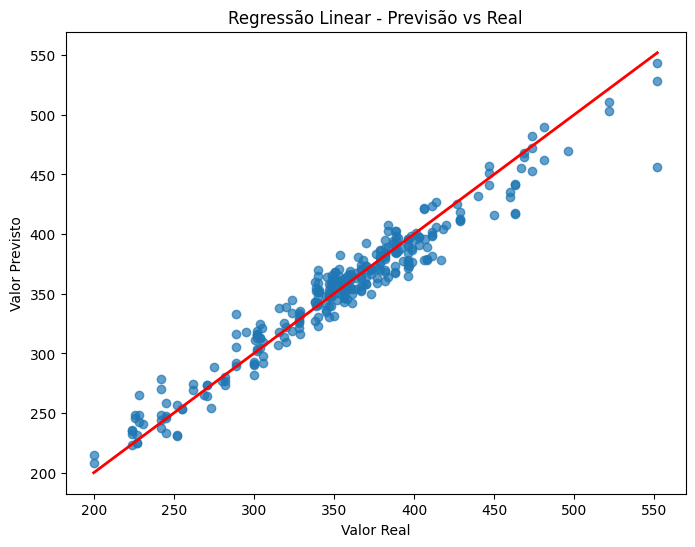

In [ ]:
def predict_weight_optimized(model_path="datasets/juntos.csv"):
    df = pd.read_csv(model_path)
    df = df[df['Real'] > 0].copy()
    
    # Criando features derivadas
    df['Aspect_Ratio'] = df['Width'] / df['Length']
    df['Density'] = df['Real'] / df['Volume']
    df['Height_Proportion'] = df['Height_Centroid'] / df['Height_average']
    
    features = ['Width', 'Length', 'Height_Centroid', 'Height_average', 'Aspect_Ratio', 'Density', 'Height_Proportion']
    
    # Remover outliers
    #df = remove_outliers(df, features)
    
    X = df[features].copy()
    y = df['Real'].copy()
    
    # Remover valores NaN ou infinitos
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y = y.loc[X.index]  # Garantir alinhamento dos índices
    
    # Normalização
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42,
        subsample=0.9,
        reg_lambda=5,
        reg_alpha=0.05,
        n_estimators=300,
        min_child_weight=2,
        max_depth=6,
        learning_rate=0.03,
        gamma=0.2,
        colsample_bytree=0.9
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Métricas de avaliação
    mse_teste = mean_squared_error(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    erro_medio = np.mean(y_pred - y_test)
    r2 = r2_score(y_test, y_pred)
    
    print("Resultados:")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")
    print(f"Erro Médio: {erro_medio}")
    print(f"R²: {r2}")
    
    # Comparação entre pesos reais e preditos
    result_df = pd.DataFrame({'Peso Real': y_test, 'Peso Predito': y_pred})
    result_df['Diferença'] = result_df['Peso Real'] - result_df['Peso Predito']
    
    print("\nComparação entre Peso Real e Peso Predito:")
    print(result_df[['Peso Real', 'Peso Predito', 'Diferença']])
    
    plot_distr_regr(y_test, y_pred)
    return model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df

# Rodar a função
model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df = predict_weight_optimized()

result_df.to_csv("dataset_comparacao/comFeaturesJuntos.csv", index=False, encoding="utf-8")


### Sem Novas Features

#### regression.csv

Resultados:
MAE: 19.981325108370335
MAPE: 5.9065335923232105%
Erro Médio: -1.424080498784566
R²: 0.8074774742126465

Comparação entre Peso Real e Peso Predito:
      Peso Real  Peso Predito  Diferença
558         347    344.890564   2.109436
168         384    381.015625   2.984375
240         403    427.432129 -24.432129
664         328    339.678772 -11.678772
271         289    295.357452  -6.357452
...         ...           ...        ...
155         423    433.973755 -10.973755
310         341    347.015778  -6.015778
1084        339    373.646942 -34.646942
423         379    366.335419  12.664581
700         280    251.370911  28.629089

[278 rows x 3 columns]


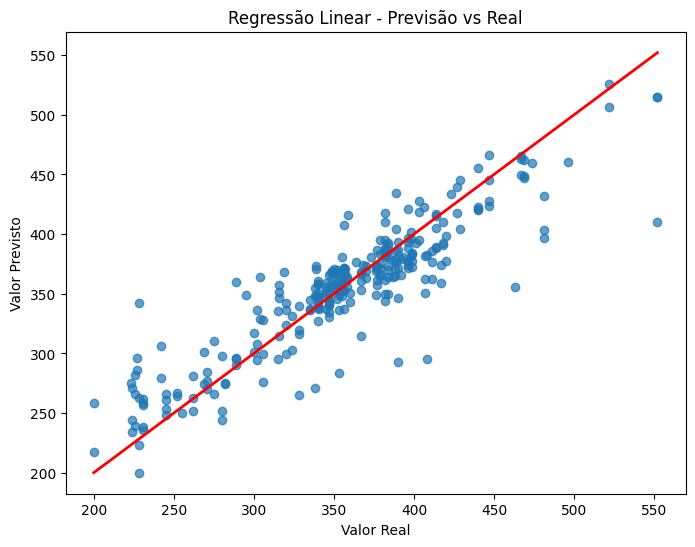

In [ ]:
def predict_weight_optimized(model_path="datasets/regression.csv"):
    df = pd.read_csv(model_path)
    df = df[df['Real'] > 0].copy()
    
    # sem novas fetures
    features = ['Width', 'Length', 'Height_Centroid', 'Height_average', 'Volume']
    
    # remove outliers
    #df = remove_outliers(df, features)
    
    X = df[features].copy()
    y = df['Real'].copy()
    
    # remove valores NaN ou infinitos
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y = y.loc[X.index] 
    
    # normalização
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42,
        subsample=0.9,
        reg_lambda=5,
        reg_alpha=0.05,
        n_estimators=300,
        min_child_weight=2,
        max_depth=6,
        learning_rate=0.03,
        gamma=0.2,
        colsample_bytree=0.9
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # calculo das métricas
    mse_teste = mean_squared_error(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    erro_medio = np.mean(y_pred - y_test)
    r2 = r2_score(y_test, y_pred)
    
    print("Resultados:")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")
    print(f"Erro Médio: {erro_medio}")
    print(f"R²: {r2}")
    
    # Comparação entre pesos reais e preditos
    result_df = pd.DataFrame({'Peso Real': y_test, 'Peso Predito': y_pred})
    result_df['Diferença'] = result_df['Peso Real'] - result_df['Peso Predito']
    
    print("\nComparação entre Peso Real e Peso Predito:")
    print(result_df[['Peso Real', 'Peso Predito', 'Diferença']])
    
    plot_distr_regr(y_test, y_pred)
    return model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df

# Rodar a função
model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df = predict_weight_optimized()

result_df.to_csv("dataset_comparacao/semFeaturesRegression.csv", index=False, encoding="utf-8")


#### juntos.csv

Resultados:
MAE: 24.60082059157522
MAPE: 7.056307163520879%
Erro Médio: -0.14363825948614822
R²: 0.7113024592399597

Comparação entre Peso Real e Peso Predito:
      Peso Real  Peso Predito  Diferença
231         340    335.883209   4.116791
1240        389    417.781311 -28.781311
1384        353    372.463593 -19.463593
1477        329    347.673737 -18.673737
51          411    357.800873  53.199127
...         ...           ...        ...
1422        354    398.980927 -44.980927
1356        328    257.095337  70.904663
1170        429    375.016144  53.983856
111         469    448.474426  20.525574
1434        351    403.325226 -52.325226

[304 rows x 3 columns]


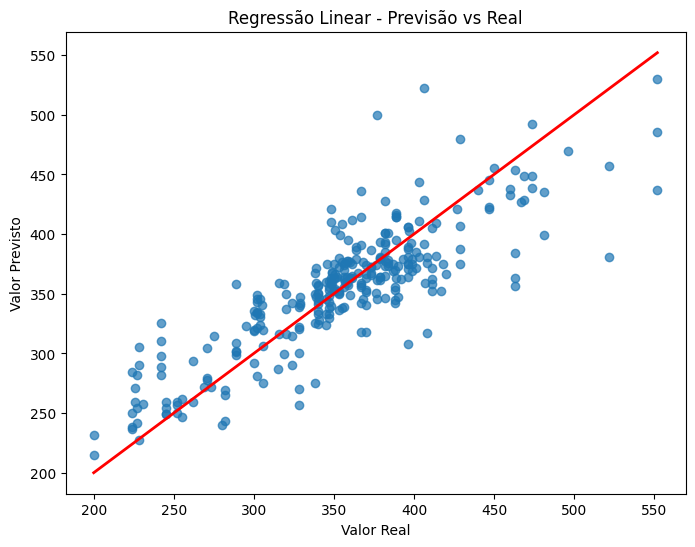

In [14]:
def predict_weight_optimized(model_path="datasets/juntos.csv"):
    df = pd.read_csv(model_path)
    df = df[df['Real'] > 0].copy()
    
    # sem novas fetures
    features = ['Width', 'Length', 'Height_Centroid', 'Height_average', 'Volume']
    
    # remove outliers
    #df = remove_outliers(df, features)
    
    X = df[features].copy()
    y = df['Real'].copy()
    
    # remove valores NaN ou infinitos
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y = y.loc[X.index] 
    
    # normalização
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42,
        subsample=0.9,
        reg_lambda=5,
        reg_alpha=0.05,
        n_estimators=300,
        min_child_weight=2,
        max_depth=6,
        learning_rate=0.03,
        gamma=0.2,
        colsample_bytree=0.9
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # calculo das métricas
    mse_teste = mean_squared_error(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    erro_medio = np.mean(y_pred - y_test)
    r2 = r2_score(y_test, y_pred)
    
    print("Resultados:")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")
    print(f"Erro Médio: {erro_medio}")
    print(f"R²: {r2}")
    
    # Comparação entre pesos reais e preditos
    result_df = pd.DataFrame({'Peso Real': y_test, 'Peso Predito': y_pred})
    result_df['Diferença'] = result_df['Peso Real'] - result_df['Peso Predito']
    
    print("\nComparação entre Peso Real e Peso Predito:")
    print(result_df[['Peso Real', 'Peso Predito', 'Diferença']])
    
    plot_distr_regr(y_test, y_pred)
    return model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df

# Rodar a função
model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df = predict_weight_optimized()

result_df.to_csv("dataset_comparacao/semFeaturesJuntos.csv", index=False, encoding="utf-8")


## Width,  -    Length,  -  Height_Centroid, -  Height_average,      -     Volume,           -         Real

## 132.0,  -    373.0,   -   1344.4734,   -   1330.6842365507637,   -   55099642.182856895,   -   396 - regression
## 142.0,  -    454.0,   -   1296.4545,   -   1342.8198479556108,   -   69392901.2828021,     -   397 - dataset nov

# loss

Resultados:
MAE: 11.203800853930021
MAPE: 3.2151008593458847%
Erro Médio: -1.9993873897351717
R²: 0.9426167607307434

Comparação entre Peso Real e Peso Predito:
      Peso Real  Peso Predito  Diferença
231         340    327.710907  12.289093
1240        389    389.598206  -0.598206
1384        353    359.025177  -6.025177
1477        329    321.765198   7.234802
51          411    406.212921   4.787079
...         ...           ...        ...
1422        354    365.766296 -11.766296
1356        328    333.338470  -5.338470
1170        429    408.894501  20.105499
111         469    458.235352  10.764648
1434        351    353.916687  -2.916687

[304 rows x 3 columns]
evals_result["validation_0"]["rmse"]=[81.12323001972943, 79.68879110755509, 78.26516458454263, 76.81197346024689, 75.87515004512345, 74.51416074916318, 73.26785829773053, 72.00384637786071, 71.15340672921904, 69.93946574076925, 69.11411795973598, 68.12168363865011, 67.00251579497036, 65.89760026420342, 65.16312865713654, 

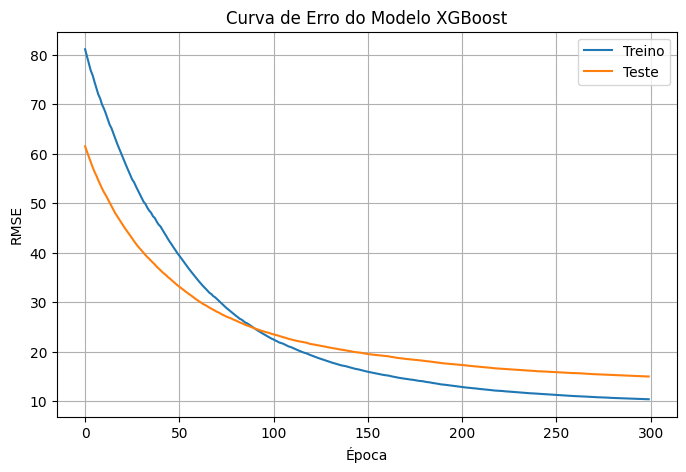

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

def predict_weight_optimized(model_path="datasets/juntos.csv"):
    df = pd.read_csv(model_path)
    df = df[df['Real'] > 0].copy()
    
    # Criando features derivadas
    df['Aspect_Ratio'] = df['Width'] / df['Length']
    df['Density'] = df['Real'] / df['Volume']
    df['Height_Proportion'] = df['Height_Centroid'] / df['Height_average']
    
    features = ['Width', 'Length', 'Height_Centroid', 'Height_average', 'Aspect_Ratio', 'Density', 'Height_Proportion']
    
    X = df[features].copy()
    y = df['Real'].copy()
    
    # Remover valores NaN ou infinitos
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y = y.loc[X.index]  # Garantir alinhamento dos índices
    
    # Normalização
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Criar um dicionário de parâmetros
    params = {
        "objective": "reg:squarederror",
        "random_state": 42,
        "subsample": 0.9,
        "reg_lambda": 5,
        "reg_alpha": 0.05,
        "n_estimators": 300,
        "min_child_weight": 2,
        "max_depth": 4,
        "learning_rate": 0.03,
        "gamma": 0.2,
        "colsample_bytree": 0.9,
        "eval_metric": "rmse"  # ✅ Definir métrica de erro aqui
    }
    
    model = xgb.XGBRegressor(**params)
    
    # Treinamento do modelo
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False,
        
    )

    # Capturando os resultados do treinamento
    evals_result = model.evals_result()
    
    y_pred = model.predict(X_test)

    # Cálculo das métricas de avaliação
    mse_teste = mean_squared_error(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    erro_medio = np.mean(y_pred - y_test)
    r2 = r2_score(y_test, y_pred)
    
    print("Resultados:")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")
    print(f"Erro Médio: {erro_medio}")
    print(f"R²: {r2}")

    # Comparação entre pesos reais e preditos
    result_df = pd.DataFrame({'Peso Real': y_test, 'Peso Predito': y_pred})
    result_df['Diferença'] = result_df['Peso Real'] - result_df['Peso Predito']
    
    print("\nComparação entre Peso Real e Peso Predito:")
    print(result_df[['Peso Real', 'Peso Predito', 'Diferença']])

    # Plotar o gráfico de perda
    plot_loss(evals_result)
    
    return model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df

def plot_loss(evals_result):
    """Função para plotar a curva de erro do treino e teste."""
    epochs = len(evals_result["validation_0"]["rmse"])
    x_axis = range(0, epochs)

    print(f'{evals_result["validation_0"]["rmse"]=} and {evals_result["validation_1"]["rmse"]=}')
    print(f'Média do RMSE no treino: {np.mean(evals_result["validation_0"]["rmse"]):.4f}')
    print(f'Média do RMSE no teste: {np.mean(evals_result["validation_1"]["rmse"]):.4f}')


    plt.figure(figsize=(8, 5))
    plt.plot(x_axis, evals_result["validation_0"]["rmse"], label="Treino")
    plt.plot(x_axis, evals_result["validation_1"]["rmse"], label="Teste")
    plt.xlabel("Época")
    plt.ylabel("RMSE")
    plt.title("Curva de Erro do Modelo XGBoost")
    plt.legend()
    plt.grid()
    plt.show()

# Rodar a função
model, y_pred, mse_teste, mae, mape, erro_medio, r2, result_df = predict_weight_optimized()
